In [289]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model
import seaborn as sns
from matplotlib import pyplot
file_name = "C:/Users/akhil/OneDrive/Desktop/Machine Learning/regression_1.csv" 

In [290]:
data = pd.read_csv(file_name)

In [291]:
data

,File Name,File Version,Update Date,Region Code,State Code,Date Type,Date,Population age 18-64,SSA Disabilty Beneficiaries age 18-64,Percent of Adult Population Receiving SSA Adult Disability Benefits,...,Eligible Child Population,SSI Disabled Child (DC) Receipts,Eligible Child Population Filing Rate,Favorable SSI Child (DC) Determinations,Eligible Child Population Allowance Rate,All SSI Disabled Child Determinations,SSI Disabled Child Allowance Rate,All Determinations,All Favorable Determinations,Favorable Determination Rate
0,SSA-SA-FYWL.csv,2,3/14/2018,ATL,AL,FY,2001,2760170,211792,7.67,...,1.09e+06,10602,0.97,4344,0.40,10879,39.93,49900,19623,39.32
1,SSA-SA-FYWL.csv,2,3/14/2018,ATL,AL,FY,2002,2770228,223434,8.07,...,1.09e+06,11780,1.09,4337,0.40,12259,35.38,62660,20149,32.16
2,SSA-SA-FYWL.csv,2,3/14/2018,ATL,AL,FY,2003,2787370,232793,8.35,...,1.08e+06,12605,1.17,4047,0.37,12565,32.21,58848,17405,29.58
3,SSA-SA-FYWL.csv,2,3/14/2018,ATL,AL,FY,2004,2803855,242764,8.66,...,1.08e+06,12881,1.19,3928,0.36,13227,29.70,62024,17571,28.33
4,SSA-SA-FYWL.csv,2,3/14/2018,ATL,AL,FY,2005,2824057,253545,8.98,...,1.08e+06,11956,1.11,3430,0.32,11868,28.90,58558,16658,28.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,SSA-SA-FYWL.csv,2,3/14/2018,SFO,NV,FY,2014,1774027,86344,4.87,...,6.53e+05,2582,0.40,1206,0.18,2445,49.33,16615,6178,37.18
932,SSA-SA-FYWL.csv,2,3/14/2018,SFO,NV,FY,2015,1788490,88864,4.97,...,6.59e+05,2950,0.45,1317,0.20,2428,54.24,12929,5187,40.12
933,SSA-SA-FYWL.csv,2,3/14/2018,SFO,NV,FY,2016,1810060,90401,4.99,...,6.67e+05,2794,0.42,1579,0.24,3092,51.07,14528,5480,37.72
934,SSA-SA-FYWL.csv,2,3/14/2018,SFO,NV,FY,2017,1855598,90995,4.90,...,6.71e+05,2395,0.36,1202,0.18,2474,48.59,17924,5947,33.18


In [292]:
data = data.drop('File Name',axis=1)

In [293]:
data = data.drop('File Version',axis=1)

In [294]:
data = data.drop('Update Date',axis=1)

In [295]:
data = data.drop('SSA Disabilty Beneficiaries  age 18-64',axis=1)

In [296]:
data = data.drop(['Eligible Child Population','SSI Disabled Child (DC) Receipts','Eligible Child Population Filing Rate','Favorable SSI Child (DC) Determinations'
,'Eligible Child Population Allowance Rate','All SSI Disabled Child Determinations','SSI Disabled Child Allowance Rate','All Determinations','All Favorable Determinations',
'Favorable Determination Rate','Percent of Population under age 18 Receiving SSI DC Benefits','SSI Disabled Child (DC) Beneficiaries',
            'Population under age 18'], axis=1)

In [297]:
data

,Region Code,State Code,Date Type,Date,Population age 18-64,Percent of Adult Population Receiving SSA Adult Disability Benefits,Eligible Adult Population,Adult Receipts,Eligible Adult Population Filing Rate,Favorable Adult Determinations,Eligible Adult Population Allowance Rate,All Adult Determinations,Adult Favorable Determination Rate
0,ATL,AL,FY,2001,2760170,7.67,2548378,42416,1.66,15279,0.60,39021,39.16
1,ATL,AL,FY,2002,2770228,8.07,2546794,45172,1.77,15812,0.62,50401,31.37
2,ATL,AL,FY,2003,2787370,8.35,2554577,47729,1.87,13358,0.52,46283,28.86
3,ATL,AL,FY,2004,2803855,8.66,2561091,49115,1.92,13643,0.53,48797,27.96
4,ATL,AL,FY,2005,2824057,8.98,2570512,47778,1.86,13228,0.51,46690,28.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,SFO,NV,FY,2014,1774027,4.87,1687683,13430,0.80,4972,0.29,14170,35.09
932,SFO,NV,FY,2015,1788490,4.97,1699626,11989,0.71,3870,0.23,10501,36.85
933,SFO,NV,FY,2016,1810060,4.99,1719659,14344,0.83,3901,0.23,11436,34.11
934,SFO,NV,FY,2017,1855598,4.90,1764603,15143,0.86,4745,0.27,15450,30.71


In [298]:
data = data.drop(['Region Code','State Code'],axis=1)
data

,Date Type,Date,Population age 18-64,Percent of Adult Population Receiving SSA Adult Disability Benefits,Eligible Adult Population,Adult Receipts,Eligible Adult Population Filing Rate,Favorable Adult Determinations,Eligible Adult Population Allowance Rate,All Adult Determinations,Adult Favorable Determination Rate
0,FY,2001,2760170,7.67,2548378,42416,1.66,15279,0.60,39021,39.16
1,FY,2002,2770228,8.07,2546794,45172,1.77,15812,0.62,50401,31.37
2,FY,2003,2787370,8.35,2554577,47729,1.87,13358,0.52,46283,28.86
3,FY,2004,2803855,8.66,2561091,49115,1.92,13643,0.53,48797,27.96
4,FY,2005,2824057,8.98,2570512,47778,1.86,13228,0.51,46690,28.33
...,...,...,...,...,...,...,...,...,...,...,...
931,FY,2014,1774027,4.87,1687683,13430,0.80,4972,0.29,14170,35.09
932,FY,2015,1788490,4.97,1699626,11989,0.71,3870,0.23,10501,36.85
933,FY,2016,1810060,4.99,1719659,14344,0.83,3901,0.23,11436,34.11
934,FY,2017,1855598,4.90,1764603,15143,0.86,4745,0.27,15450,30.71


In [299]:
data

,Date Type,Date,Population age 18-64,Percent of Adult Population Receiving SSA Adult Disability Benefits,Eligible Adult Population,Adult Receipts,Eligible Adult Population Filing Rate,Favorable Adult Determinations,Eligible Adult Population Allowance Rate,All Adult Determinations,Adult Favorable Determination Rate
0,FY,2001,2760170,7.67,2548378,42416,1.66,15279,0.60,39021,39.16
1,FY,2002,2770228,8.07,2546794,45172,1.77,15812,0.62,50401,31.37
2,FY,2003,2787370,8.35,2554577,47729,1.87,13358,0.52,46283,28.86
3,FY,2004,2803855,8.66,2561091,49115,1.92,13643,0.53,48797,27.96
4,FY,2005,2824057,8.98,2570512,47778,1.86,13228,0.51,46690,28.33
...,...,...,...,...,...,...,...,...,...,...,...
931,FY,2014,1774027,4.87,1687683,13430,0.80,4972,0.29,14170,35.09
932,FY,2015,1788490,4.97,1699626,11989,0.71,3870,0.23,10501,36.85
933,FY,2016,1810060,4.99,1719659,14344,0.83,3901,0.23,11436,34.11
934,FY,2017,1855598,4.90,1764603,15143,0.86,4745,0.27,15450,30.71


In [300]:
converter = LabelEncoder()
data['Date Type'] = converter.fit_transform(data['Date Type'].astype(str))

In [301]:
data.isnull().any()

Date Type                                                              False
Date                                                                   False
Population age 18-64                                                   False
Percent of Adult Population Receiving SSA Adult Disability Benefits    False
Eligible Adult Population                                              False
Adult Receipts                                                         False
Eligible Adult Population Filing Rate                                  False
Favorable Adult Determinations                                         False
Eligible Adult Population Allowance Rate                               False
All Adult Determinations                                               False
Adult Favorable  Determination Rate                                    False
dtype: bool

In [302]:
data.head(10)

,Date Type,Date,Population age 18-64,Percent of Adult Population Receiving SSA Adult Disability Benefits,Eligible Adult Population,Adult Receipts,Eligible Adult Population Filing Rate,Favorable Adult Determinations,Eligible Adult Population Allowance Rate,All Adult Determinations,Adult Favorable Determination Rate
0,0,2001,2760170,7.67,2548378,42416,1.66,15279,0.60,39021,39.16
1,0,2002,2770228,8.07,2546794,45172,1.77,15812,0.62,50401,31.37
2,0,2003,2787370,8.35,2554577,47729,1.87,13358,0.52,46283,28.86
3,0,2004,2803855,8.66,2561091,49115,1.92,13643,0.53,48797,27.96
4,0,2005,2824057,8.98,2570512,47778,1.86,13228,0.51,46690,28.33
5,0,2006,2855278,9.19,2592839,51055,1.97,14071,0.54,49380,28.50
6,0,2007,2878957,9.36,2609583,50212,1.92,13159,0.50,47422,27.75
7,0,2008,2898356,9.58,2620665,53663,2.05,15737,0.60,48937,32.16
8,0,2009,2928795,9.91,2638531,61551,2.33,18107,0.69,56749,31.91
9,0,2010,2994402,9.91,2690425,69540,2.64,19301,0.73,62300,30.98


In [303]:
data.dtypes

Date Type                                                                int32
Date                                                                     int64
Population age 18-64                                                     int64
Percent of Adult Population Receiving SSA Adult Disability Benefits    float64
Eligible Adult Population                                                int64
Adult Receipts                                                           int64
Eligible Adult Population Filing Rate                                  float64
Favorable Adult Determinations                                           int64
Eligible Adult Population Allowance Rate                               float64
All Adult Determinations                                                 int64
Adult Favorable  Determination Rate                                    float64
dtype: object

In [304]:
data = data.rename(columns = {"Date": "Year"})

In [305]:
data

,Date Type,Year,Population age 18-64,Percent of Adult Population Receiving SSA Adult Disability Benefits,Eligible Adult Population,Adult Receipts,Eligible Adult Population Filing Rate,Favorable Adult Determinations,Eligible Adult Population Allowance Rate,All Adult Determinations,Adult Favorable Determination Rate
0,0,2001,2760170,7.67,2548378,42416,1.66,15279,0.60,39021,39.16
1,0,2002,2770228,8.07,2546794,45172,1.77,15812,0.62,50401,31.37
2,0,2003,2787370,8.35,2554577,47729,1.87,13358,0.52,46283,28.86
3,0,2004,2803855,8.66,2561091,49115,1.92,13643,0.53,48797,27.96
4,0,2005,2824057,8.98,2570512,47778,1.86,13228,0.51,46690,28.33
...,...,...,...,...,...,...,...,...,...,...,...
931,0,2014,1774027,4.87,1687683,13430,0.80,4972,0.29,14170,35.09
932,0,2015,1788490,4.97,1699626,11989,0.71,3870,0.23,10501,36.85
933,0,2016,1810060,4.99,1719659,14344,0.83,3901,0.23,11436,34.11
934,0,2017,1855598,4.90,1764603,15143,0.86,4745,0.27,15450,30.71


In [306]:
pd.set_option('precision',2)
data_1=data.describe()

In [307]:
data_1

,Date Type,Year,Population age 18-64,Percent of Adult Population Receiving SSA Adult Disability Benefits,Eligible Adult Population,Adult Receipts,Eligible Adult Population Filing Rate,Favorable Adult Determinations,Eligible Adult Population Allowance Rate,All Adult Determinations,Adult Favorable Determination Rate
count,936.0,936.00,9.36e+02,936.00,9.36e+02,936.00,936.00,936.00,936.00,936.00,936.00
mean,0.0,2009.50,3.75e+06,6.05,3.52e+06,42862.15,1.26,14062.82,0.42,41605.41,35.43
std,0.0,5.19,4.21e+06,1.95,4.01e+06,44230.23,0.44,15251.57,0.13,43256.90,7.21
min,0.0,2001.00,3.09e+05,2.60,1.06e+05,1462.00,0.41,764.00,0.15,1601.00,21.50
25%,0.0,2005.00,1.05e+06,4.66,9.56e+05,10453.00,0.96,3724.00,0.33,10072.25,30.48
50%,0.0,2009.50,2.59e+06,5.56,2.36e+06,31949.50,1.13,9910.50,0.40,30685.00,34.37
75%,0.0,2014.00,4.29e+06,6.98,4.01e+06,53579.75,1.45,17718.50,0.49,51989.50,39.23
max,0.0,2018.00,2.51e+07,12.57,2.41e+07,249112.00,4.39,97457.00,1.74,233656.00,66.22


Skewness: 1.852481
Kurtosis: 13.695944


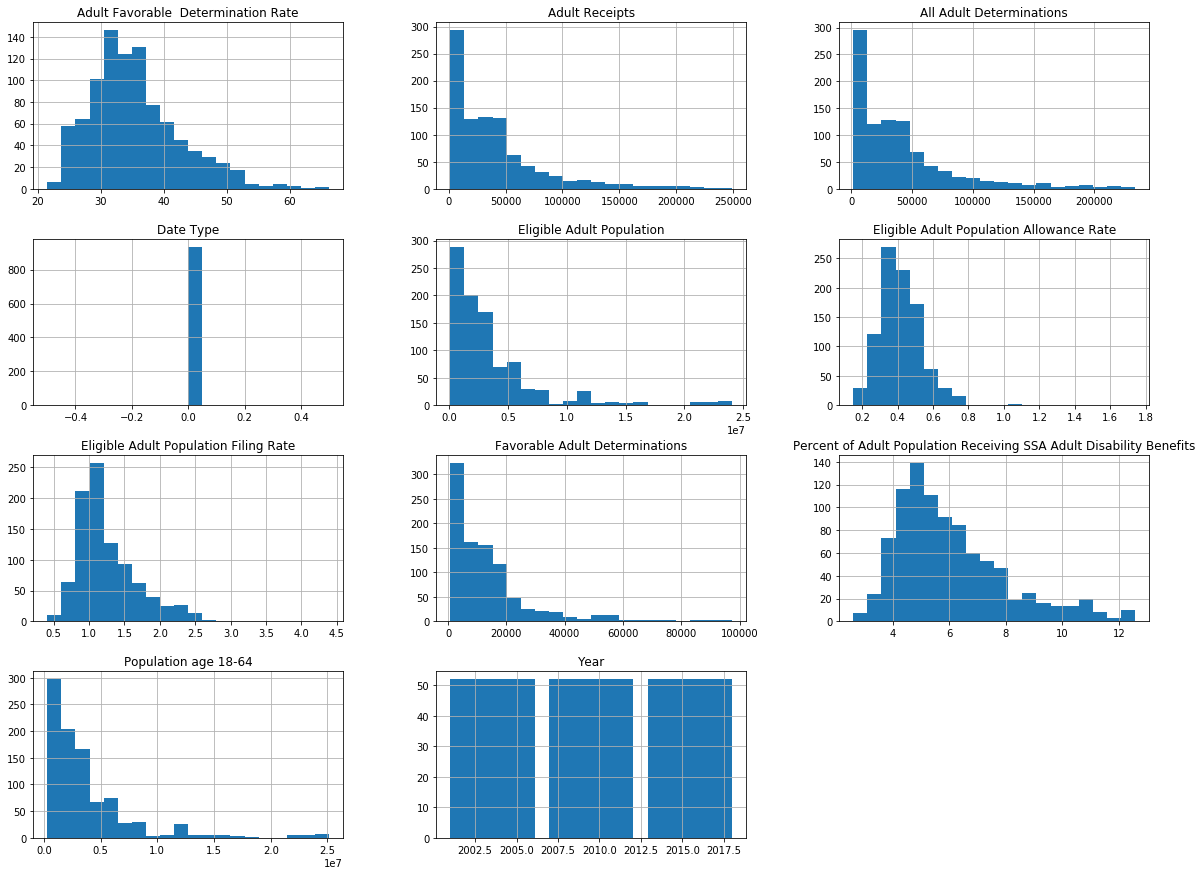

In [308]:
print("Skewness: %f" % data['Eligible Adult Population Allowance Rate'].skew())
print("Kurtosis: %f" % data['Eligible Adult Population Allowance Rate'].kurt())
histogram = data.hist(bins = 20,figsize=(20,15))

                                                    Date Type      Year  \
Date Type                                                 NaN       NaN   
Year                                                      NaN  1.00e+00   
Population age 18-64                                      NaN  3.69e-02   
Percent of Adult Population Receiving SSA Adult...        NaN  2.84e-01   
Eligible Adult Population                                 NaN  3.07e-02   
Adult Receipts                                            NaN  1.77e-02   
Eligible Adult Population Filing Rate                     NaN -9.18e-03   
Favorable Adult Determinations                            NaN -2.62e-02   
Eligible Adult Population Allowance Rate                  NaN -1.12e-01   
All Adult Determinations                                  NaN  2.34e-02   
Adult Favorable  Determination Rate                       NaN -1.87e-01   

                                                    Population age 18-64  \
Date Type              

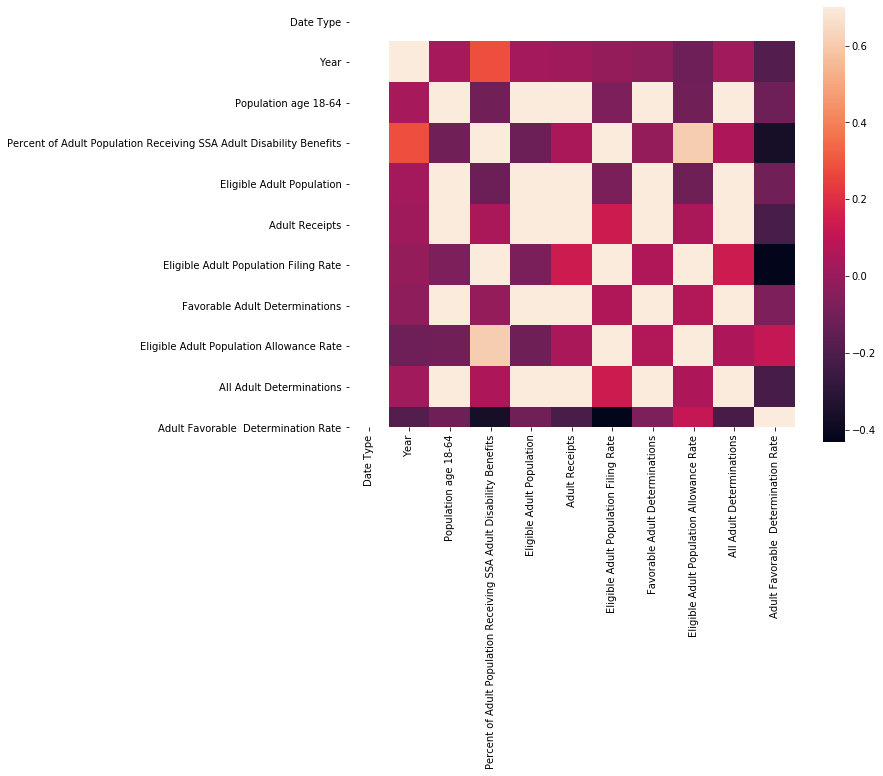

In [309]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(10, 8))
print(corrmat)
sns.heatmap(corrmat, vmax=.7, square=True);

In [310]:
x = data.iloc[:,1:8]
y = data.iloc[:,8]

In [311]:
len(x)

936

In [312]:
len(y)

936

In [313]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [314]:
regr = linear_model.LinearRegression()

regr.fit(x_train,y_train)

y_pred = regr.predict(x_test)


In [315]:
print(y_pred)

[0.48083916 0.28743873 0.2819165  0.40902834 0.36519247 0.53141332
 0.30653495 0.28802792 0.34280554 0.38034602 0.26574642 0.5460334
 0.5235596  0.47393675 0.60772851 0.41184957 0.44252868 0.34920161
 0.53347596 0.60469115 0.33578653 0.36853207 0.47399924 0.35772877
 0.64369628 0.44202866 0.40621853 0.39200306 0.49874629 0.38016462
 0.32344224 0.37857157 0.5254224  0.42164122 0.63075659 0.66041636
 0.48354312 0.67356712 0.45961728 0.54445907 0.56204636 0.31920934
 0.39824975 0.51131205 0.45442998 0.30623863 0.30924778 0.38914447
 0.67676961 0.43440012 0.50916148 0.50798373 0.65734256 0.38423598
 0.63232728 0.44726533 0.27742907 0.2393013  0.43390948 0.54213214
 0.46762188 0.44713034 0.36051454 0.40988904 0.45665144 0.29907744
 0.65981709 0.36554612 0.45616557 0.31522483 0.3478795  0.48093064
 0.60888893 0.3289244  0.39350443 0.5865841  0.5171426  0.34715417
 0.34755679 0.30491739 0.30437611 0.56733108 0.30261394 0.38697924
 0.38129362 0.34028354 0.70940652 0.54554451 0.50001348 0.46036

In [316]:
print('Coefficients: \n', regr.coef_)

# The mean squared error
from sklearn.metrics import mean_squared_error,r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(y_test,y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

from sklearn import metrics
print("Accuracy: %.2f"
      % metrics.r2_score(y_pred,y_test))

Coefficients: 
 [ 9.81354082e-04  1.75052385e-08 -1.10792248e-02 -2.12291878e-08
 -5.43210442e-06  3.12575558e-01  1.62432750e-05]
Mean squared error: 0.00
Variance score: 0.77
Accuracy: 0.74


Text(0, 0.5, 'Predicted Value')

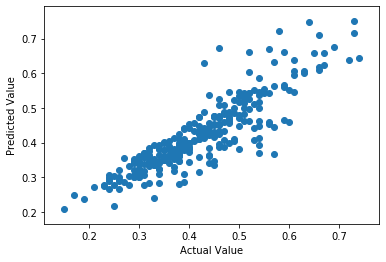

In [317]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

In [318]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model=LinearRegression()
rfe=RFE(model,2)
k=rfe.fit(x,y)
print("Number of features"+" "+ str(k.n_features_))

print("Number of features"+" "+ str(k.support_))

print("Number of features"+" "+ str(k.ranking_))

Number of features 2
Number of features [ True False False False False  True False]
Number of features [1 6 2 5 4 1 3]


In [319]:
data

,Date Type,Year,Population age 18-64,Percent of Adult Population Receiving SSA Adult Disability Benefits,Eligible Adult Population,Adult Receipts,Eligible Adult Population Filing Rate,Favorable Adult Determinations,Eligible Adult Population Allowance Rate,All Adult Determinations,Adult Favorable Determination Rate
0,0,2001,2760170,7.67,2548378,42416,1.66,15279,0.60,39021,39.16
1,0,2002,2770228,8.07,2546794,45172,1.77,15812,0.62,50401,31.37
2,0,2003,2787370,8.35,2554577,47729,1.87,13358,0.52,46283,28.86
3,0,2004,2803855,8.66,2561091,49115,1.92,13643,0.53,48797,27.96
4,0,2005,2824057,8.98,2570512,47778,1.86,13228,0.51,46690,28.33
...,...,...,...,...,...,...,...,...,...,...,...
931,0,2014,1774027,4.87,1687683,13430,0.80,4972,0.29,14170,35.09
932,0,2015,1788490,4.97,1699626,11989,0.71,3870,0.23,10501,36.85
933,0,2016,1810060,4.99,1719659,14344,0.83,3901,0.23,11436,34.11
934,0,2017,1855598,4.90,1764603,15143,0.86,4745,0.27,15450,30.71


In [320]:
data_1 = pd.read_csv(file_name,usecols = ['Date','Eligible Adult Population Filing Rate','Eligible Adult Population Allowance Rate'] )

In [321]:
X1 = data_1.iloc[:,1:2]
Y1 = data_1.iloc[:,2]

In [322]:
#x1_train, x1_test, y1_train, y1_test = train_test_split(X1,Y1,test_size = 0.3)

x_train = X1[:-40]#If dont know the length of dataset ,so we can use likee this (from top to -20)
x_test = X1[-40:]

y_train = Y1[:-40]#If dont know the length of dataset ,so we can use likee this (from top to -20)
y_test = Y1[-40:]

regr = linear_model.LinearRegression()

regr.fit(x1_train,y1_train)

y1_pred = regr.predict(x1_test)

In [323]:
y1_pred
len(y1_pred)

281

In [324]:
print('Coefficients: \n', regr.coef_)

# The mean squared error
from sklearn.metrics import mean_squared_error,r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(y1_test,y1_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y1_test, y1_pred))

from sklearn import metrics
print("Accuracy: %.2f"
      % metrics.r2_score(y1_pred,y1_test))

Coefficients: 
 [0.23384382]
Mean squared error: 0.01
Variance score: 0.61
Accuracy: 0.37


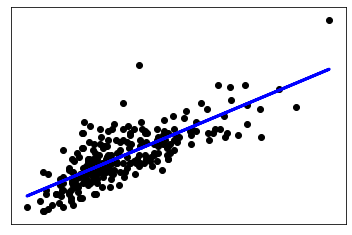

In [325]:
plt.scatter(x1_test, y1_test,  color='black')
plt.plot(x1_test, y1_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

0      0.60
1      0.62
2      0.52
3      0.53
4      0.51
       ... 
931    0.29
932    0.23
933    0.23
934    0.27
935    0.27
Name: Eligible Adult Population Allowance Rate, Length: 936, dtype: float64

281

Coefficients: 
 [0.23384382]
Mean squared error: 0.01
Variance score: 0.61
Accuracy: 0.37


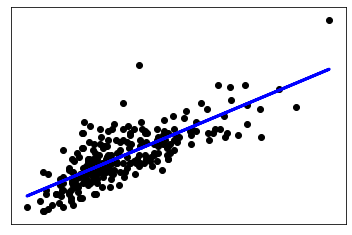